## Finding maximum values

This workbook calculates the blackbody spectra of 'hot' objects, in this case a hot cup of tea and a person. However this is just a vehicle for demonstrating how you can find the maximum values from a NumPy array, and also find the input variable this corresponds to.

In this case, we can find the maximum intensity from the calculation and the wavelength to which that intensity belongs.

The Planck equation describes a blackbody radiation curve, it is an incredibly important equation in quantum theory as it was the first use of quantisation of energy. The Planck equation states:


\begin{equation}
I_{\lambda, T} = \frac{2hc^2}{\lambda ^5 e^{\frac{hc}{\lambda k_B T}}-1}
\end{equation}

This notebook uses a [function](http://blogs.bath.ac.uk/python/functions/) to calculate the intensity of the radiation at each wavelength.

Other techniques used in this notebook are:
- [scipy.constants](http://blogs.bath.ac.uk/python/working-with-physical-constants-and-units/) for importing universal constants such as $c$, $h$, $k_\mathrm{B}$.
- `matplotlib.pyplot` to plot the calculated spectrum.
- `numpy` to generate the arrays used for the calculations.
- using `np.argmax` and `np.amax` to find the wavelength of the maximum value and the maximum intensity respectively

Some other useful things to note...
- you can enter greek letters into print statements by typing the LaTeX command and pressing tab at the end of the word, so `\mu` 'tab' changes the letter to read $\mu$.
- you can change the colour of the lines on your plot. In my plot statements you can see the use of 'c-' and 'm-', which colours the lines cyan and magenta respectively.
- other colours include 'k-' black, 'r-' red, 'g-' green & 'b-' blue. A [whole range of named colours](https://matplotlib.org/examples/color/named_colors.html) can be used in `matplotlib` but these are most of the single letter colours.
- the use of markdown and LaTeX when presenting the result, but that is for another post

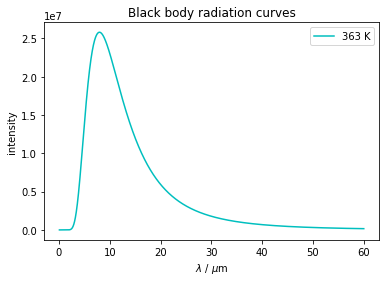

λ max = 79.83 μm
I max =  25814151.3197 J m^2


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import h #Planck's constant
from scipy.constants import c #speed of light
from scipy.constants import k #Boltzmann constant
from IPython.display import Markdown as md
#
def planck(lambdanm, T):
    intensity = 2.0*h*c**2/ ( (lambdanm**5) * (np.exp(h*c/(lambdanm*k*T)) - 1.0) )
    return intensity
#
## wavelengths in increments from 100nm to 60 um in 1 nm increments
wavelengths = np.arange(100e-9, 60e-6, 1e-9) 
#
## intensity at 363K, 310K
intensity363 = planck(wavelengths, 363.) #hotcupoftea
#intensity310 = planck(wavelengths, 310.) #person

#note the use of the multiplier on the wavelengths such that it willnow have units of μm
plt.plot(wavelengths*1e6, intensity363, 'c-', label='363 K') #hotcupoftea - cyan
#plt.plot(wavelengths*1e6, intensity310, 'm-', label='310') #person - magenta

plt.title('Black body radiation curves')
plt.legend() # Shows the legend
plt.xlabel('$\lambda$ / $\mu$m')
plt.ylabel('intensity')
## show the plot
plt.show()

print ("λ max =", wavelengths[np.argmax(intensity363)]*10e6, "μm")#maximum wavelength of emission, np.argmax(intensity373,axis=0)] is pulling the maximum value from the intensity array and then matching it to the corresponding wavelength in put to the calculation
#you can get the mu symbol by typing in the latex for it then pressing tab! so \mu tab!
print ("I max = ", np.amax(intensity363), "J m^2")

In [2]:
from IPython.display import Markdown as md
lambda_max = wavelengths[ np.argmax( intensity363 ) ] 
display( md(r"$\lambda_\mathrm{{max}}$ = {:.3f} $\mu$m".format( lambda_max * 1e6 ) ) )
display( md(r"$I_\mathrm{{max}}$ = {:.3e} J m$^{{-2}}$.".format( np.max( intensity363 ) ) ) )

$\lambda_\mathrm{max}$ = 7.983 $\mu$m

$I_\mathrm{max}$ = 2.581e+07 J m$^{-2}$.